In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [2]:
#import warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [71]:
#Melihat isi database olist
conn = sqlite3.connect('olist.db')
list_table = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(list_table)

                                name
0       olist_order_customer_dataset
1                olist_order_dataset
2        olist_order_reviews_dataset
3       olist_order_payments_dataset
4          olist_order_items_dataset
5             olist_products_dataset
6              olist_sellers_dataset
7          olist_geolocation_dataset
8  product_category_name_translation


In [4]:
#Membaca dan mengambil data dari database
conn = sqlite3.connect('olist.db')
query1 = 'SELECT * FROM olist_order_customer_dataset' 
customers = pd.read_sql(query1, conn)

query2 = 'SELECT * FROM olist_order_dataset' 
orders = pd.read_sql(query2, conn)

query3 = 'SELECT * FROM olist_order_items_dataset' 
order_items = pd.read_sql(query3, conn)

query4 = 'SELECT * FROM olist_order_payments_dataset' 
payments = pd.read_sql(query4, conn)

query5 = 'SELECT * FROM olist_products_dataset' 
products = pd.read_sql(query5, conn)

query6 = 'SELECT * FROM product_category_name_translation'
product_category_name_translation = pd.read_sql(query6, conn)

# CLEANING DATA

## CLEANING TABEL CUSTOMERS

In [5]:
#cek info
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     99441 non-null  int64 
 1   customer_id               99441 non-null  object
 2   customer_unique_id        99441 non-null  object
 3   customer_zip_code_prefix  99441 non-null  int64 
 4   customer_city             99441 non-null  object
 5   customer_state            99441 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.6+ MB


### handling missing values 

In [6]:
#identifikasi missing values
(customers.isna().sum()/len(customers)*100).sort_values(ascending=False)

index                       0.0
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

### handling duplikat

In [7]:
#identifikasi duplikat
customers[customers.duplicated(keep=False)]

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


### handling outlier

In [8]:
#identifikasi outlier
##cek data statistik deskriptif
customers.describe(include='all')


,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441.000000,99441,99441,99441.000000,99441,99441
unique,NaN,99441,96096,NaN,4119,27
top,NaN,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,NaN,1,17,NaN,15540,41746
mean,49720.000000,NaN,NaN,35137.474583,NaN,NaN
std,28706.288396,NaN,NaN,29797.938996,NaN,NaN
min,0.000000,NaN,NaN,1003.000000,NaN,NaN
25%,24860.000000,NaN,NaN,11347.000000,NaN,NaN
50%,49720.000000,NaN,NaN,24416.000000,NaN,NaN
75%,74580.000000,NaN,NaN,58900.000000,NaN,NaN


Dari data statistitk deskriptif, terlihat bahwa kolom yang memilii data dengan tipe int hanya index dan customer_zip_code_prefix. kolom tersebut tidak perlu dilakukan handling outlier karena memiliki nilai diskrit.

### handling inkonsisten

In [9]:
#identifkasi inkonsisten
customers.head(15)

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [10]:
#cek kolom customer_state
customers['customer_state'].unique()


array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

Sekilas tidak ada yang aneh pada data di kolom customer_state, sehingga bisa dikatakan konsisten

In [11]:
#mengubah nama variabel tabel customers
customers_clean = customers

## CLEANING TABEL ORDERS

In [72]:
#cek info tabel orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          96461 non-null  int64         
 1   order_id                       96461 non-null  object        
 2   customer_id                    96461 non-null  object        
 3   order_status                   96461 non-null  object        
 4   order_purchase_timestamp       96461 non-null  datetime64[ns]
 5   order_approved_at              96461 non-null  datetime64[ns]
 6   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 7   order_delivered_customer_date  96461 non-null  datetime64[ns]
 8   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(1), object(3)
memory usage: 7.4+ MB


In [12]:
#parsing date
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

### handling missing values

In [13]:
#identifikasi missing values

orders = orders.dropna()

(orders.isna().sum()/len(orders)*100).sort_values(ascending=False)


index                            0.0
order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
dtype: float64

### handling duplikat

In [14]:
#identifikasi duplikat
orders[orders.duplicated(keep=False)]

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


### handling outlier

In [15]:
#identifikasi outlier
orders.describe(include='all')

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461.000000,96461,96461,96461,96461,96461,96461,96461,96461
unique,NaN,96461,96461,2,NaN,NaN,NaN,NaN,NaN
top,NaN,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,96455,NaN,NaN,NaN,NaN,NaN
mean,49713.841750,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544
min,0.000000,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,24852.000000,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00
50%,49715.000000,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00
75%,74572.000000,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00
max,99440.000000,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


terlihat pada data frame, kolom kolomnya tidak memiliki nilai data diskrit. sehingga tidak memiliki outlier

### handling inkonsisten

In [16]:
#cek kolom order_status
orders['order_status'].unique()

array(['delivered', 'canceled'], dtype=object)

Dari kolom kolom yang ada pada tabel orders. hanya kolom order_status saja yang berkemungkinan memiliki outlier. Namun setelah di cek, kondisi datanya sudah konsisten

In [17]:
#cek tabel order_status
orders.head(5)

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


Terlihat pada kolom order_estimated_delivery_date berbeda dengan kolom kolom date lainnya. Namun kolom tersebut tidak akan digunakan, maka tidak akan dilakukan penyeragaman

In [18]:
#mengubah nama variabel tabel orders
orders_clean = orders

## CLEANING TABEL ORDER ITEMS

In [19]:
#cek info
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                112650 non-null  int64  
 1   order_id             112650 non-null  object 
 2   order_item_id        112650 non-null  int64  
 3   product_id           112650 non-null  object 
 4   seller_id            112650 non-null  object 
 5   shipping_limit_date  112650 non-null  object 
 6   price                112650 non-null  float64
 7   freight_value        112650 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


### handling missing values

In [20]:
#identifikasi missing values
(order_items.isna().sum()/len(order_items)*100).sort_values(ascending=True)

index                  0.0
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

### handling duplikat

In [21]:
#identifikasi duplikat
order_items[order_items.duplicated(keep=False)]

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


### handling outlier

In [22]:
# identifkasi outlier melalui data statistik deskriptif

order_items.describe(include='all')

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,NaN,98666,NaN,32951,3095,93318,NaN,NaN
top,NaN,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,NaN,21,NaN,527,2033,21,NaN,NaN
mean,56324.500000,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,32519.398249,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,0.000000,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,28162.250000,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,56324.500000,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,84486.750000,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Dari data statistik, terlihat bahwa kolom price dan freight_value memiliki outlier karena nilai dari Q3 ke maxnya jauh. Namun cara ini tidak representatif. maka dari itu perlu di amati lebih jauh dengan visualisasi

Text(0, 0.5, 'jumlah')

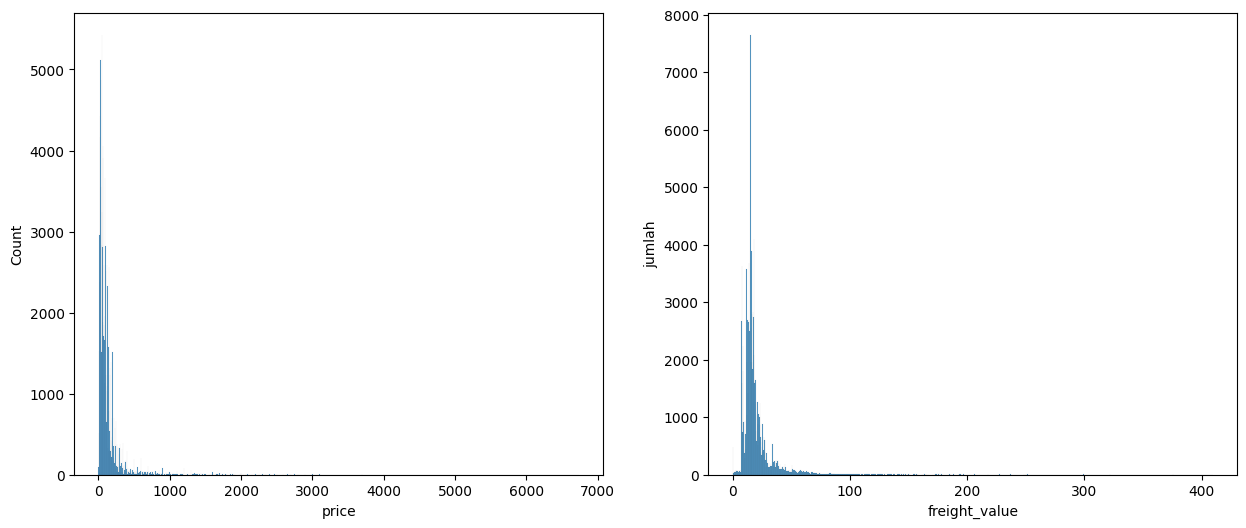

In [23]:
#identifikasi outlier pada kolom price dan freight_value

fig, ax = plt.subplots(ncols=2, nrows=1,figsize = (15,6))

sns.histplot(data=order_items, x='price', ax= ax[0])
plt.ylabel('jumlah')

sns.histplot(data=order_items, x='freight_value', ax= ax[1])
plt.ylabel('jumlah')

In [24]:
#handling outlier price
Q1_price = order_items.price.quantile(0.25)
Q3_price = order_items.price.quantile(0.75)



batas_bawah_price = Q1_price - (Q3_price-Q1_price)*1.5
batas_atas_price = Q3_price + (Q3_price-Q1_price)*1.5
order_items_handling_outlier_price = order_items
median_price = order_items['price'].median()
order_items_handling_outlier_price.loc[order_items_handling_outlier_price['price'] > batas_atas_price, 'price'] = median_price



# #handling outlier freight_value
Q1_freight_value = order_items.freight_value.quantile(0.25)
Q3_freight_value = order_items.freight_value.quantile(0.75)

batas_bawah_freight_value = Q1_freight_value - (Q3_freight_value-Q1_freight_value)*1.5
batas_atas_freight_value = Q3_freight_value + (Q3_freight_value-Q1_freight_value)*1.5
median_freight_value = order_items['freight_value'].median()

order_items_handling_outlier_price_n_freight_value = order_items_handling_outlier_price

order_items_handling_outlier_price_n_freight_value.loc[order_items_handling_outlier_price_n_freight_value['freight_value'] > batas_atas_freight_value, 'freight_value'] = median_freight_value

<Axes: xlabel='freight_value', ylabel='Count'>

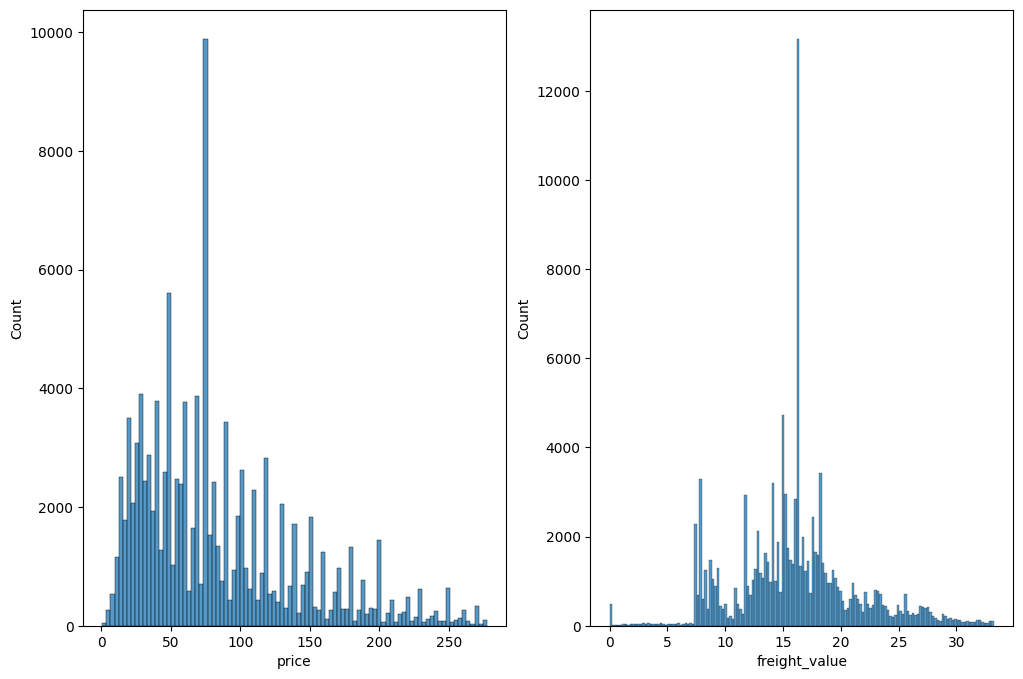

In [25]:
#menampilkan distribusi tabel order items setelah handle outlier
fig, ax = plt.subplots(ncols=2, nrows=1,figsize = (12,8))

sns.histplot(data=order_items_handling_outlier_price_n_freight_value, x='price', ax= ax[0])

sns.histplot(data=order_items_handling_outlier_price_n_freight_value, x='freight_value', ax= ax[1])

### handling inkonsisten

In [26]:
#cek sebagian tabel
order_items_handling_outlier_price_n_freight_value.head(10)

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,74.99,16.26
8,8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


secara sekilas data terlihat konsisten

In [27]:
#cek kolom order_item_id
order_items_handling_outlier_price_n_freight_value['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

kolom order_item_id memliki data yang konsisten

In [28]:
#mengubah nama variabel tabel order items
order_items_clean = order_items_handling_outlier_price_n_freight_value

## CLEANSING TABEL PAYMENTS

In [29]:
#cek info
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 103886 non-null  int64  
 1   order_id              103886 non-null  object 
 2   payment_sequential    103886 non-null  int64  
 3   payment_type          103886 non-null  object 
 4   payment_installments  103886 non-null  int64  
 5   payment_value         103886 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ MB


In [30]:
#cek describe
payments.describe(include='all')

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886.00000,103886,103886.000000,103886,103886.000000,103886.000000
unique,NaN,99440,NaN,5,NaN,NaN
top,NaN,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,NaN,29,NaN,76795,NaN,NaN
mean,51942.50000,NaN,1.092679,NaN,2.853349,154.100380
std,29989.44937,NaN,0.706584,NaN,2.687051,217.494064
min,0.00000,NaN,1.000000,NaN,0.000000,0.000000
25%,25971.25000,NaN,1.000000,NaN,1.000000,56.790000
50%,51942.50000,NaN,1.000000,NaN,1.000000,100.000000
75%,77913.75000,NaN,1.000000,NaN,4.000000,171.837500


### handling missing values

In [31]:
#identifikasi missing values
(payments.isna().sum()/len(payments)*100).sort_values(ascending=True)

index                   0.0
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

### handling duplikat

In [32]:
#identifikasi duplikat
payments[payments.duplicated(keep=False)]

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value


### handling outlier

<Axes: xlabel='payment_value', ylabel='Count'>

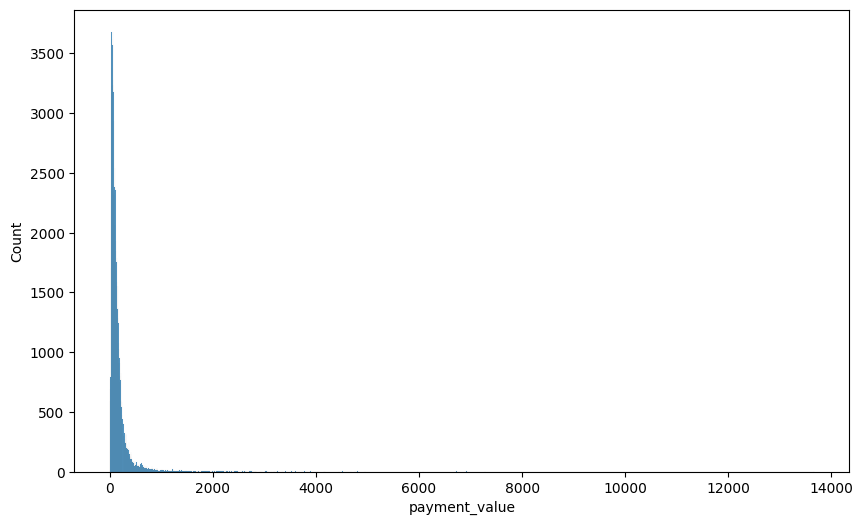

In [33]:
#identifikasi outlier kolom payment_value

fig, ax = plt.subplots(figsize= (10,6))

sns.histplot(data=payments, x='payment_value')

In [34]:
# perhitungan Q1 dan Q3 data payment_value
Q1_payment_value = payments.payment_value.quantile(0.25)
Q3_payment_value = payments.payment_value.quantile(0.75)


# perhitungan batas bawah dan batas atas
batas_bawah_payment_value = Q1_payment_value - (Q3_payment_value - Q1_payment_value)*1.5
batas_atas_payment_value = Q3_payment_value + (Q3_payment_value - Q1_payment_value)*1.5

#perhitungan median kolom payment_value
median_payment_value = payments['payment_value'].median()

#imputasi median ke data outlier
payment_handling_outlier = payments
payment_handling_outlier.loc[payment_handling_outlier['payment_value'] > batas_atas_payment_value, 'payment_value'] = median_payment_value


<Axes: xlabel='payment_value', ylabel='Count'>

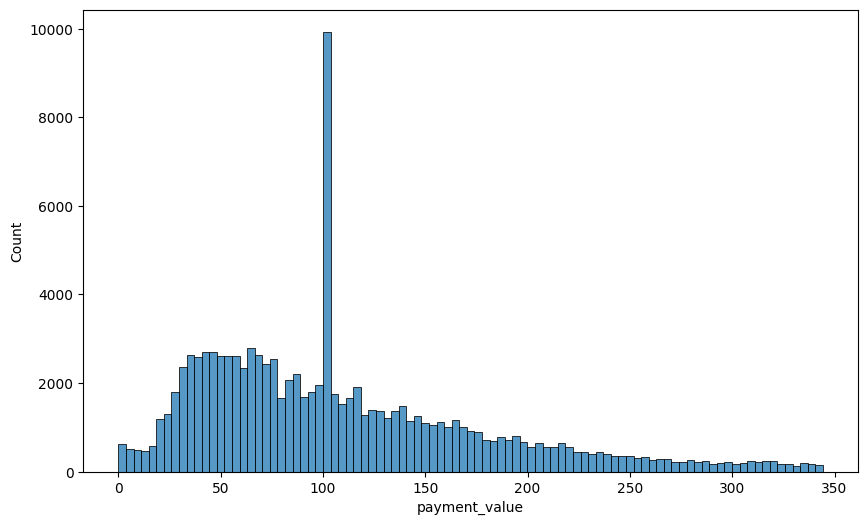

In [35]:
#menampilkan distribusi tabel payment setelah handle outlier
fig, ax = plt.subplots(figsize= (10,6))

sns.histplot(data=payment_handling_outlier, x='payment_value')

### handling inkonsisten

In [36]:
#cek tabel payments
payment_handling_outlier

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...,...
103881,103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,100.00
103882,103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,100.00


In [37]:
#cek kolom payment_type
payment_handling_outlier.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

data kolom payment_type sudah konsisten

In [38]:
#cek kolom payment_sequential
payments.payment_sequential.unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20], dtype=int64)

data kolom payment_sequential sudah konsisten

In [39]:
#cek kolom payment_installments
payment_handling_outlier.payment_installments.unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23], dtype=int64)

begitu juga dengan data kolom payment_installments, sudah konsisten

In [40]:
#mengubah nama variabe tabel payments
payments_clean = payment_handling_outlier

## CLEANING TABEL PRODUCTS

In [41]:
#cek info
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       32951 non-null  int64  
 1   product_id                  32951 non-null  object 
 2   product_category_name       32341 non-null  object 
 3   product_name_lenght         32341 non-null  float64
 4   product_description_lenght  32341 non-null  float64
 5   product_photos_qty          32341 non-null  float64
 6   product_weight_g            32949 non-null  float64
 7   product_length_cm           32949 non-null  float64
 8   product_height_cm           32949 non-null  float64
 9   product_width_cm            32949 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ MB


In [42]:
#cek describe
products.describe(include='all')

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,NaN,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,16475.000000,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,9512.278697,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,0.000000,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,8237.500000,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,16475.000000,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,24712.500000,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


### handling missing values

In [43]:
#identifikasi missing value
(products.isna().sum()/len(products)*100).sort_values(ascending=False)

product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
index                         0.000000
product_id                    0.000000
dtype: float64

In [44]:
#menampilkan tabel yang terdapat missing values
products_missing = products[products.isnull().any(axis=1)]
products_missing.head(10)

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,105,a41e356c76fab66334f36de622ecbd3a,None,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,128,d8dee61c2034d6d075997acef1870e9b,None,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,145,56139431d72cd51f19eb9f7dae4d1617,None,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,154,46b48281eb6d663ced748f324108c733,None,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,197,5fb61f482620cb672f5e586bb132eae9,None,NaN,NaN,NaN,300.0,35.0,7.0,12.0
244,244,e10758160da97891c2fdcbc35f0f031d,None,NaN,NaN,NaN,2200.0,16.0,2.0,11.0
294,294,39e3b9b12cd0bf8ee681bbc1c130feb5,None,NaN,NaN,NaN,300.0,16.0,7.0,11.0
299,299,794de06c32a626a5692ff50e4985d36f,None,NaN,NaN,NaN,300.0,18.0,8.0,14.0
347,347,7af3e2da474486a3519b0cba9dea8ad9,None,NaN,NaN,NaN,200.0,22.0,14.0,14.0
428,428,629beb8e7317703dcc5f35b5463fd20e,None,NaN,NaN,NaN,1400.0,25.0,25.0,25.0


Dari tabel terlihat data yang missing values terdapat dalam satu baris. dan selain itu proposi data yang missing value juga sedikit. maka dari itu saya akan melakukan handling missing values dengan metode drop

In [45]:
#drop data yang terdapat missing values
products_handle_missing_values = products.dropna()

In [46]:
#identifikasi missing value
(products_handle_missing_values.isna().sum()/len(products)*100).sort_values(ascending=False)

index                         0.0
product_id                    0.0
product_category_name         0.0
product_name_lenght           0.0
product_description_lenght    0.0
product_photos_qty            0.0
product_weight_g              0.0
product_length_cm             0.0
product_height_cm             0.0
product_width_cm              0.0
dtype: float64

### handling duplikat

In [47]:
#identifikasi duplikat
products_handle_missing_values[products_handle_missing_values.duplicated(keep=False)]

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


### handling outlier

In [48]:
#identifikasi outlier
products_handle_missing_values.describe(include='all')

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,NaN,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,16482.169728,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,9507.559444,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,0.000000,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,8248.750000,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,16479.500000,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,24711.250000,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


kolom yang ingin saya gunakan adalah product_category_name. dimana kolom tersebut memiliki tipe data object sehingga tidak memiliki outlier

### handling inkonsisten

In [49]:
#cek tabel products
products_handle_missing_values.head(15)

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


di lihat sekilas dai tabel. data sudah konsisten

In [50]:
#mengubah nama variabel tabel products
products_clean = products_handle_missing_values

## CLEANING TABEL PRODUCT CATEGORY NAME TRANSLATION

In [51]:
# cek info
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          71 non-null     int64 
 1   product_category_name          71 non-null     object
 2   product_category_name_english  71 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


In [52]:
# cek describe
product_category_name_translation.describe(include='all')

,index,product_category_name,product_category_name_english
count,71.000000,71,71
unique,NaN,71,71
top,NaN,beleza_saude,health_beauty
freq,NaN,1,1
mean,35.000000,NaN,NaN
std,20.639767,NaN,NaN
min,0.000000,NaN,NaN
25%,17.500000,NaN,NaN
50%,35.000000,NaN,NaN
75%,52.500000,NaN,NaN


### handling missing values

In [53]:
# identifikasi missing values
(product_category_name_translation.isna().sum()/len(products)*100).sort_values(ascending=False)

index                            0.0
product_category_name            0.0
product_category_name_english    0.0
dtype: float64

### handling duplikat

In [54]:
#identifikasi duplikat
product_category_name_translation[product_category_name_translation.duplicated(keep=False)]

,index,product_category_name,product_category_name_english


### handling outlier

In [55]:
#identifikasi outlier
product_category_name_translation.describe(include='all')

,index,product_category_name,product_category_name_english
count,71.000000,71,71
unique,NaN,71,71
top,NaN,beleza_saude,health_beauty
freq,NaN,1,1
mean,35.000000,NaN,NaN
std,20.639767,NaN,NaN
min,0.000000,NaN,NaN
25%,17.500000,NaN,NaN
50%,35.000000,NaN,NaN
75%,52.500000,NaN,NaN


tabel tidak memiliki kolom yang mengandung data diskrit, sehingga tidak memiliki outlier

### handling inkonsisten

In [56]:
#identifikasi inkonsistem
product_category_name_translation['product_category_name_english'].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

jika dilihat dari kolom product_category_name_english, tidak ada keanehan apapun. sehingga data bisa di anggap konsisten

In [57]:
#identifikasi inkonsisten
product_category_name_translation['product_category_name'].unique()

array(['beleza_saude', 'informatica_acessorios', 'automotivo',
       'cama_mesa_banho', 'moveis_decoracao', 'esporte_lazer',
       'perfumaria', 'utilidades_domesticas', 'telefonia',
       'relogios_presentes', 'alimentos_bebidas', 'bebes', 'papelaria',
       'tablets_impressao_imagem', 'brinquedos', 'telefonia_fixa',
       'ferramentas_jardim', 'fashion_bolsas_e_acessorios',
       'eletroportateis', 'consoles_games', 'audio', 'fashion_calcados',
       'cool_stuff', 'malas_acessorios', 'climatizacao',
       'construcao_ferramentas_construcao',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'construcao_ferramentas_jardim', 'fashion_roupa_masculina',
       'pet_shop', 'moveis_escritorio', 'market_place', 'eletronicos',
       'eletrodomesticos', 'artigos_de_festas', 'casa_conforto',
       'construcao_ferramentas_ferramentas', 'agro_industria_e_comercio',
       'moveis_colchao_e_estofado', 'livros_tecnicos', 'casa_construcao',
       'instrumentos_musicais', 'm

Begitu juga dengan kolom product_category_name_english, data sudah konsisten

In [58]:
#mengubah nama variabel tabel product category name
product_category_name_clean = product_category_name_translation

# ANALYSIS DATA

Objektif:
1. Mengetahui 5 kota dengan pemesanan terbanyak
2. Mengetahui tren penjualan dari bulan ke bulan
3. Mengetahui metode pembayaran yang paling sering digunakan
4. Mengetahui jumlah penjualan terbesar berdasarkan kategori produk

## 1. Mengetahui 5 kota dengan pemesanan terbanyak

In [59]:
#menggabungkan tabel customers dan orders
merged_customers_orders = pd.merge(customers_clean, orders_clean, on= 'customer_id')

In [60]:
#membuat tabel 5 kota dengan pemesanan terbanyak
top5_largest_orders = merged_customers_orders.groupby('customer_city').agg({'order_id': 'count'}).nlargest(5, 'order_id').reset_index()
top5_largest_orders

,customer_city,order_id
0,sao paulo,15044
1,rio de janeiro,6603
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489


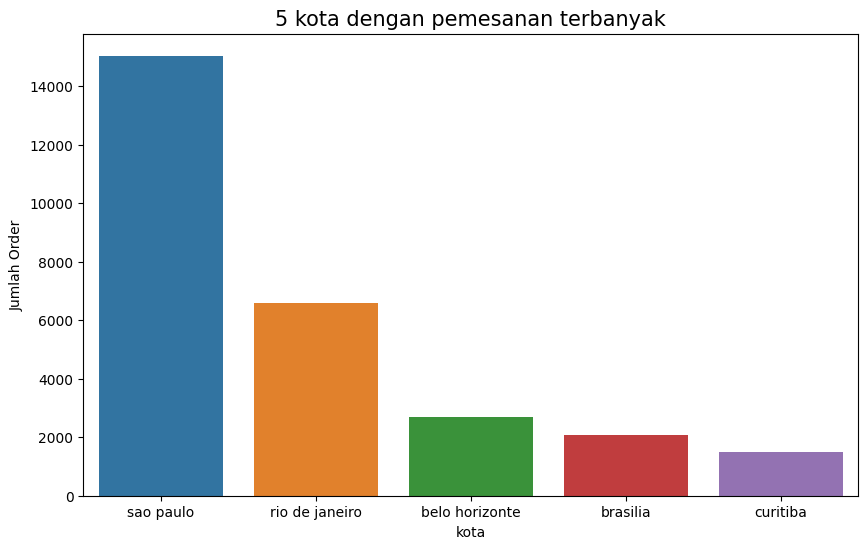

In [61]:
#membuat visualisasi 

## membuat figure
fig, ax = plt.subplots(figsize = (10,6))

## membuat plot
sns.barplot(data=top5_largest_orders, x='customer_city', y='order_id')

## membuat nama judul plot
plt.title('5 kota dengan pemesanan terbanyak', fontsize= 15)

## membuat nama label x
plt.xlabel('kota')

## membuat nama label y
plt.ylabel('Jumlah Order')

## menampilkan plot
plt.show()


## 2. Mengetahui tren penjualan dari bulan ke bulan

In [62]:
#Menggabungkan kolom orders, payments dan order items
merge_order_orderItems = pd.merge(orders_clean,order_items_clean, on= 'order_id')
merge_order_orderItems_payments = pd.merge(merge_order_orderItems, payments_clean, on= 'order_id')

#memilih kolom kolom yang ditampilkan
merge_order_orderItems_payments = merge_order_orderItems_payments[['order_id','order_status','order_purchase_timestamp','price','freight_value','payment_type','payment_value']]
merge_order_orderItems_payments.head(5)

,order_id,order_status,order_purchase_timestamp,price,freight_value,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,29.99,8.72,credit_card,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,29.99,8.72,voucher,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,29.99,8.72,voucher,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,118.70,22.76,boleto,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,159.90,19.22,credit_card,179.12


### data manipulation

In [63]:
#menambahkan kolom month
merge_order_orderItems_payments['month'] = merge_order_orderItems_payments['order_purchase_timestamp'].dt.to_period('M')

#grouping
total_penjualan = merge_order_orderItems_payments.groupby('month')['payment_value'].sum()
df_total_penjualan = total_penjualan.reset_index()
df_total_penjualan.columns = ['Bulan', 'Total_Penjualan']
df_total_penjualan['Bulan'] = df_total_penjualan['Bulan'].dt.to_timestamp()
df_total_penjualan

,Bulan,Total_Penjualan
0,2016-10-01,38338.25
1,2016-12-01,19.62
2,2017-01-01,105381.24
3,2017-02-01,214758.24
4,2017-03-01,340613.22
5,2017-04-01,305551.41
6,2017-05-01,467925.32
7,2017-06-01,395033.58
8,2017-07-01,517805.47
9,2017-08-01,558347.09


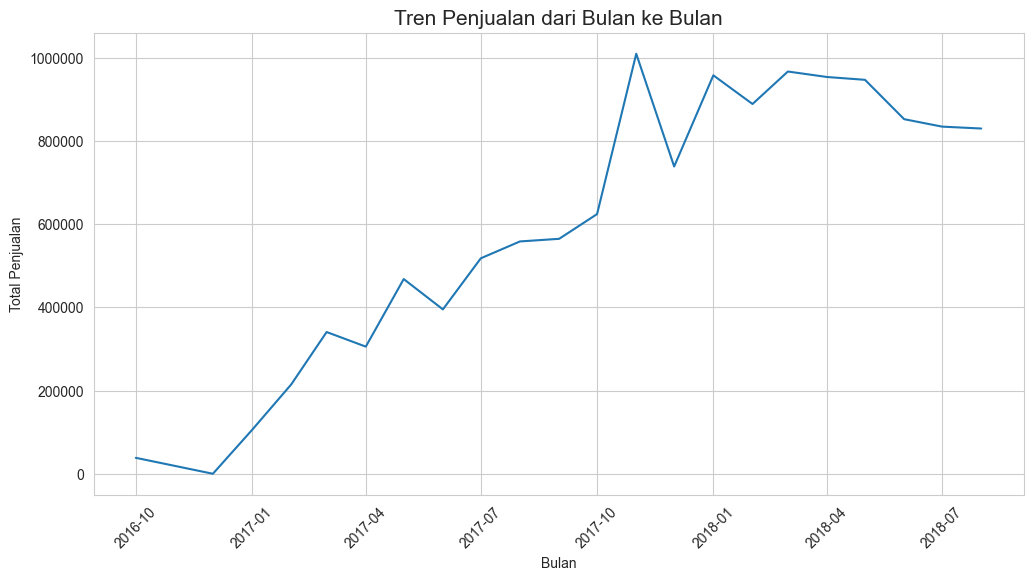

In [64]:
# visualisasi


## membuat grid
sns.set_style("whitegrid")

## membuat figure
plt.figure(figsize=(12, 6))

## membuat plot
sns.lineplot(data=df_total_penjualan, x='Bulan', y='Total_Penjualan')

## memberi judul plot
plt.title('Tren Penjualan dari Bulan ke Bulan', fontsize= 15)

## memberi nama label x
plt.xlabel('Bulan')

## memberi nama label y
plt.ylabel('Total Penjualan')

## menampilkan kolom y dengan angka real
plt.ticklabel_format(style='plain', axis='y')

## memiringkan label x
plt.xticks(rotation=45)

## menampilkan shop
plt.show()

## 3. Metode pembayaran yang paling sering digunakan

In [65]:
# grouping tabel payments
total_penjualan_berdasarkan_metode_pembayaran = payments_clean.groupby('payment_type').agg({'order_id':'count'}).reset_index().sort_values(by= 'order_id', ascending=False)
total_penjualan_berdasarkan_metode_pembayaran

,payment_type,order_id
1,credit_card,76795
0,boleto,19784
4,voucher,5775
2,debit_card,1529
3,not_defined,3


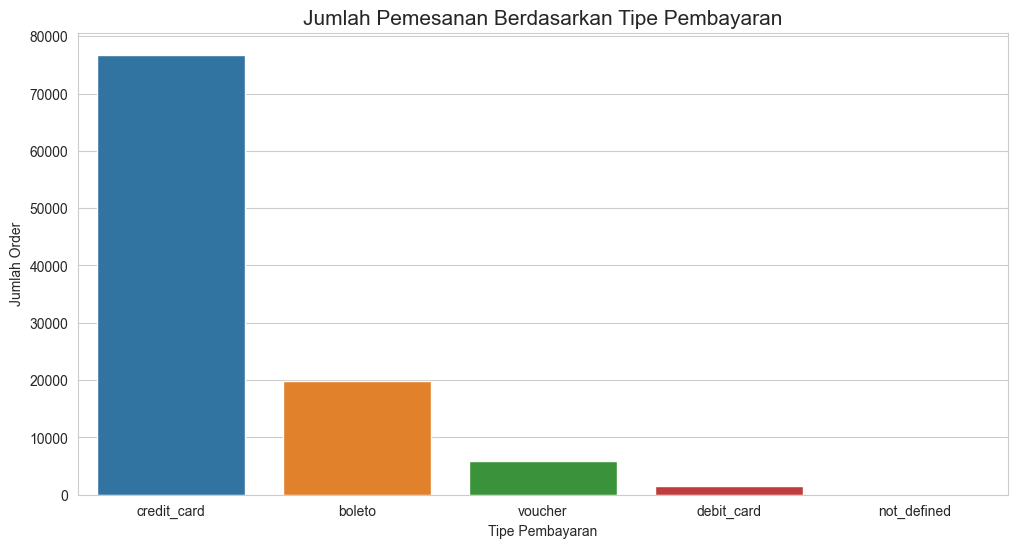

In [66]:
# membuat visualisasi

## membuat figure
plt.figure(figsize=(12, 6))

## membuat plot
sns.barplot(data=total_penjualan_berdasarkan_metode_pembayaran, x='payment_type', y='order_id')

## membuat nama judul plot
plt.title('Jumlah Pemesanan Berdasarkan Tipe Pembayaran', fontsize= 15)

## membuat nama label x
plt.xlabel('Tipe Pembayaran')

## membuat nama label y
plt.ylabel('Jumlah Order')

## menampilkan plot
plt.show()


## 4. Jumlah penjualan terbesar berdasarkan kategori produk

In [67]:
#menggabungkan kolom orders, order_items, products dan product category name translation
merge_order_orderItems_products = pd.merge(merge_order_orderItems,products_clean, on= 'product_id')
merge_order_orderItems_products_productCategory = pd.merge(merge_order_orderItems_products, product_category_name_clean, on= 'product_category_name', suffixes=('_order_items', '_product_category' ))

#menampilkan kolom yang dipilih
merge_order_orderItems_products_productCategory = merge_order_orderItems_products_productCategory[['order_id','price','product_category_name_english']]
merge_order_orderItems_products_productCategory

,order_id,price,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,29.99,housewares
1,128e10d95713541c87cd1a2e48201934,29.99,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,29.99,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,29.99,housewares
4,6ea2f835b4556291ffdc53fa0b3b95e8,74.99,housewares
...,...,...,...
108616,b99217b1fcf2fdeace7b8d869b76cb91,39.99,fashion_childrens_clothes
108617,3da4b0f0c89bb8fee8a810459e641414,110.00,fashion_childrens_clothes
108618,ee86b68eb9222b0cad7da50f4f758a35,110.00,fashion_childrens_clothes
108619,2c4ada2e75c2ad41dd93cebb5df5f023,183.29,security_and_services


In [68]:
# membuat grouping total penjualan berdasarkan kategori
grouping_penjualan_berdasarkan_kategori = merge_order_orderItems_products_productCategory.groupby('product_category_name_english').agg({'price':'sum'}).reset_index()
top5_penjualan_berdasarkan_kategori = grouping_penjualan_berdasarkan_kategori.nlargest(5,'price')
top5_penjualan_berdasarkan_kategori

,product_category_name_english,price
7,bed_bath_table,946110.58
43,health_beauty,748179.00
65,sports_leisure,733396.40
15,computers_accessories,687919.01
70,watches_gifts,641710.04


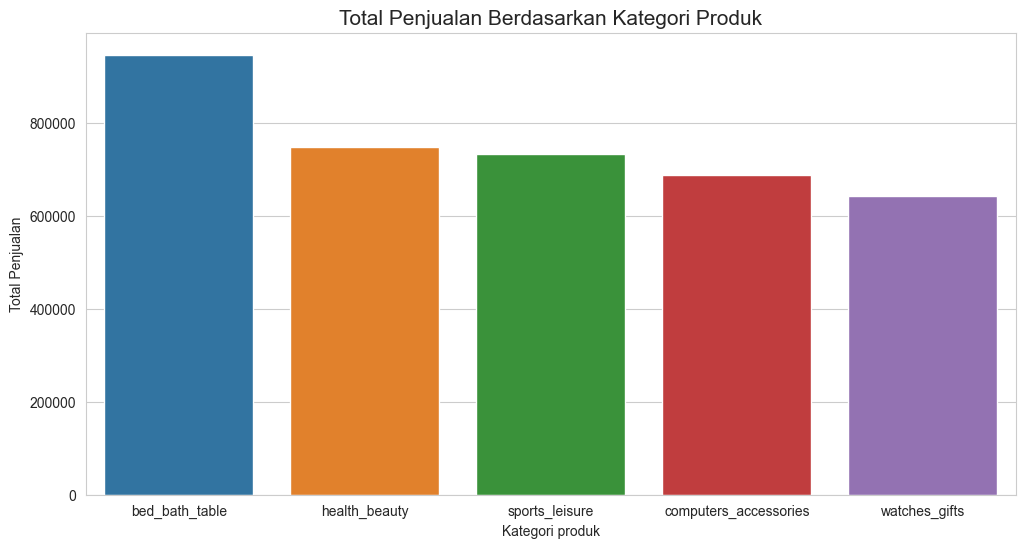

In [69]:
# membuat visualisasi

## membuat figure
plt.figure(figsize=(12, 6))

## membuat plot
sns.barplot(data=top5_penjualan_berdasarkan_kategori, x='product_category_name_english', y='price')

## membuat nama judul plot
plt.title('Total Penjualan Berdasarkan Kategori Produk', fontsize= 15)

## membuat nama label x
plt.xlabel('Kategori produk')

## membuat nama label y
plt.ylabel('Total Penjualan')

## menampilkan plot
plt.show()

